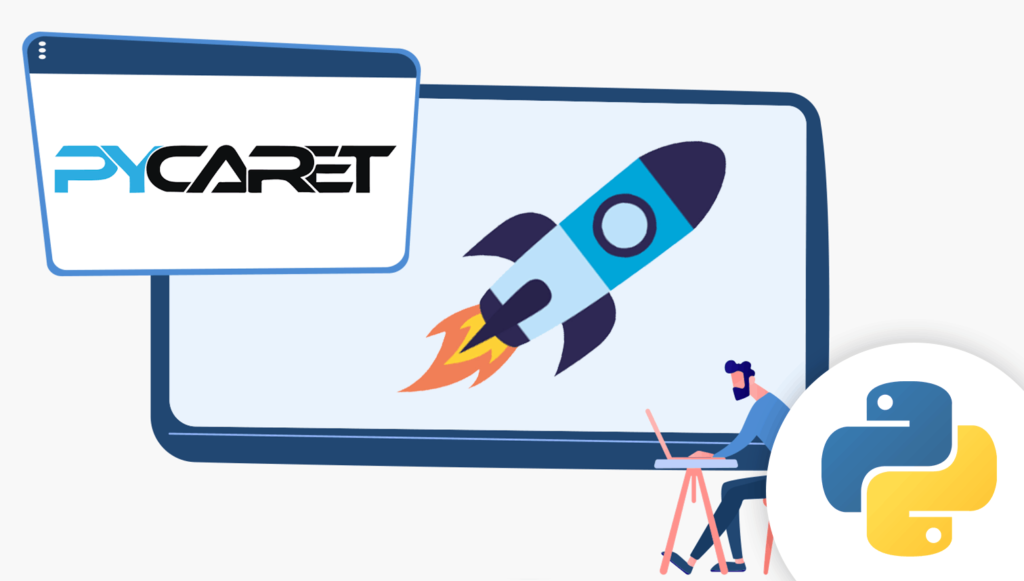

[PyCaret](https://pycaret.gitbook.io/docs) is an open-source, low-code machine learning library in Python that automates machine learning workflows.

In [2]:
import pycaret
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
catalog=pd.read_csv("https://raw.githubusercontent.com/uky994/ISLR-Py/main/Week%203/catalog.csv")
catalog

,SpendRat,Age,LenRes,Income,TotAsset,SecAssets,ShortLiq,LongLiq,WlthIdx,SpendVol,...,CollGifts,BricMortar,MarthaHome,SunAds,ThemeColl,CustDec,RetailKids,TeenWr,Carlovers,CountryColl
0,11.83,0,2,3,122,27,225,422,286,503,...,1,0,0,1,0,1,1,1,0,1
1,16.83,35,3,5,195,36,220,420,430,690,...,0,1,1,0,0,1,1,0,0,0
2,11.38,46,9,5,123,24,200,420,290,600,...,1,0,0,1,1,1,1,0,0,1
3,31.33,41,2,2,117,25,222,419,279,543,...,1,0,0,1,1,0,0,0,0,1
4,1.90,46,7,9,493,105,310,500,520,680,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,111.19,49,24,2,173,40,270,450,400,640,...,1,0,0,1,1,1,0,1,1,1
196,2.42,46,2,4,237,46,280,440,440,650,...,1,0,0,1,1,1,1,1,0,1
197,29.77,53,22,3,224,43,180,410,420,670,...,1,0,0,0,0,0,1,0,1,0
198,19.35,57,18,4,174,40,210,430,360,590,...,0,0,0,0,0,0,1,1,0,0


In [4]:
# any value less than 18 is invalid
age_lt18=(catalog['Age']<18)
age_lt18.value_counts()

Age
False    186
True      14
Name: count, dtype: int64

In [5]:
# LenRes should not be higher than Age.
lenres_gt_age=(catalog['LenRes']>catalog['Age'])
lenres_gt_age.value_counts()

False    184
True      16
Name: count, dtype: int64

In [6]:
clean_catalog=catalog[~age_lt18 | ~lenres_gt_age]
clean_catalog.shape

(186, 21)

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. data and target. All the other parameters are optional.

In [8]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(clean_catalog, target = 'SpendRat', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SpendRat
2,Target type,Regression
3,Original data shape,"(186, 21)"
4,Transformed data shape,"(186, 21)"
5,Transformed train set shape,"(130, 21)"
6,Transformed test set shape,"(56, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [9]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [10]:
# init setup on exp
exp.setup(clean_catalog, target = 'SpendRat', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SpendRat
2,Target type,Regression
3,Original data shape,"(186, 21)"
4,Transformed data shape,"(186, 21)"
5,Transformed train set shape,"(130, 21)"
6,Transformed test set shape,"(56, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [11]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,33.4512,3953.1377,54.9958,-0.4747,1.3075,3.0300,0.0110
en,Elastic Net,34.6868,3063.6245,50.0892,-0.6514,1.3496,4.6925,0.0080
br,Bayesian Ridge,37.0251,3252.9835,51.1385,-0.6739,1.4438,6.4773,0.0090
omp,Orthogonal Matching Pursuit,36.5068,3233.4140,50.9655,-0.6740,1.4294,6.5373,0.0070
ada,AdaBoost Regressor,34.3552,2735.9361,46.9369,-0.6797,1.3129,5.2301,0.0170
dummy,Dummy Regressor,37.8254,3315.2883,51.7715,-0.7142,1.4601,6.4021,0.0060
et,Extra Trees Regressor,33.2998,2828.5293,48.1896,-1.0514,1.2086,3.6359,0.0310
lightgbm,Light Gradient Boosting Machine,37.8819,3082.1136,50.6898,-1.2006,1.4247,5.0697,0.0230
lasso,Lasso Regression,36.5956,2936.0368,49.3691,-1.3813,1.2916,4.4215,0.5730
llar,Lasso Least Angle Regression,36.5952,2936.0354,49.3689,-1.3813,1.2916,4.4213,0.0080


## Analyze Model
The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

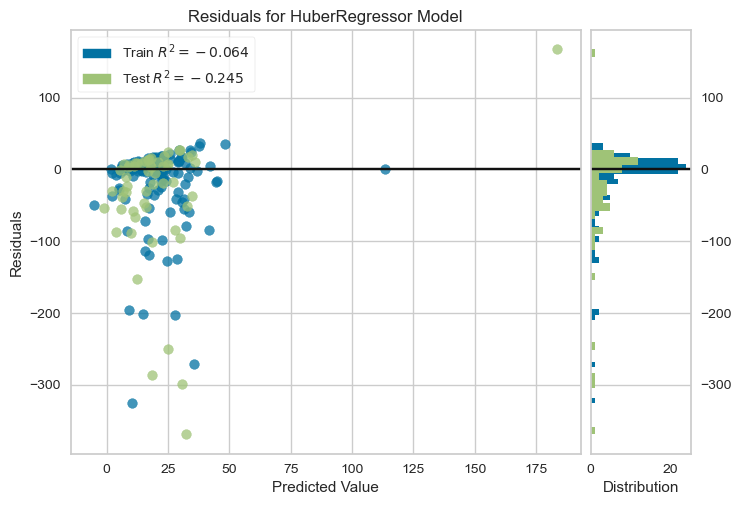

In [14]:
# plot residuals
plot_model(best, plot = 'residuals')

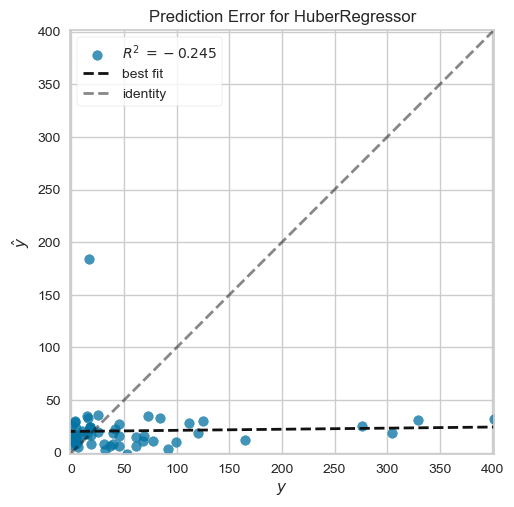

In [15]:
# plot error
plot_model(best, plot = 'error')

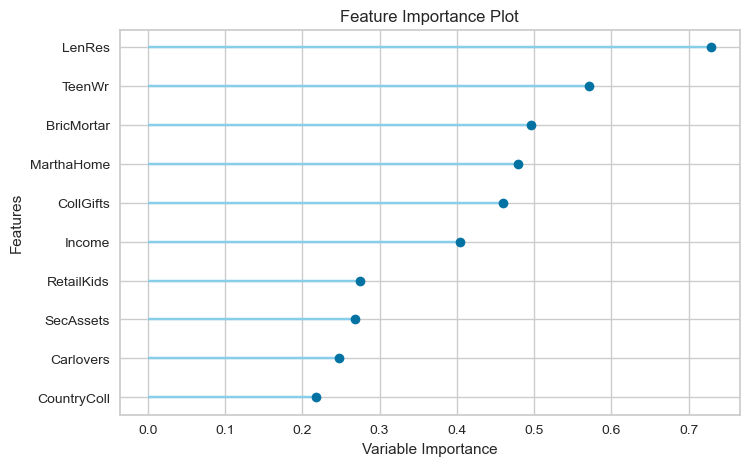

In [16]:
# plot feature importance
plot_model(best, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

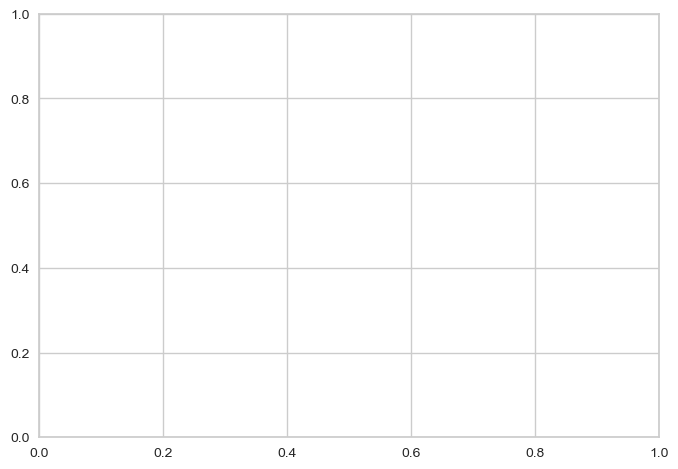

In [17]:
evaluate_model(best)

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [18]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,52.6865,8888.3315,94.2779,-0.2446,1.6027,5.9709


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

# All Classifiers

In [19]:
features = ["age", "workclass", "fnlwgt", "education", "edu_num", "marital_status",
        "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
        "hrs_per_week", "country", "target"] 

# Change these to local file if available
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

# This will download 3.8M
adult_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?")
# This will download 1.9M
adult_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?", skiprows=1)

adult = pd.concat([adult_train,adult_test])
adult.head()

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
# Check for missing values
adult.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
edu_num           False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hrs_per_week      False
country            True
target            False
dtype: bool

In [21]:
adult.describe()

,age,fnlwgt,edu_num,capital_gain,capital_loss,hrs_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
adult['target'].value_counts()

target
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [23]:
adult['target'] = adult['target'].replace(['>50K.'],'>50K')
adult['target'] = adult['target'].replace(['<=50K.'],'<=50K')

In [24]:
adult['target'].value_counts()

target
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [25]:
adult.head()

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. data and target. All the other parameters are optional.

In [27]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(adult.reset_index(), target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"<=50K: 0, >50K: 1"
4,Original data shape,"(48842, 16)"
5,Transformed data shape,"(48842, 66)"
6,Transformed train set shape,"(34189, 66)"
7,Transformed test set shape,"(14653, 66)"
8,Numeric features,7
9,Categorical features,8


In [28]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [30]:
# init setup on exp
exp.setup(adult.reset_index(), target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Target mapping,"<=50K: 0, >50K: 1"
4,Original data shape,"(48842, 16)"
5,Transformed data shape,"(48842, 66)"
6,Transformed train set shape,"(34189, 66)"
7,Transformed test set shape,"(14653, 66)"
8,Numeric features,7
9,Categorical features,8


In [31]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8730,0.0000,0.8730,0.8685,0.8689,0.6304,0.6346,0.3750
gbc,Gradient Boosting Classifier,0.8664,0.0000,0.8664,0.8612,0.8595,0.5993,0.6090,1.0570
ada,Ada Boost Classifier,0.8616,0.0000,0.8616,0.8558,0.8558,0.5911,0.5975,0.4700
rf,Random Forest Classifier,0.8582,0.0000,0.8582,0.8523,0.8530,0.5842,0.5893,0.7380
et,Extra Trees Classifier,0.8421,0.0000,0.8421,0.8364,0.8381,0.5455,0.5480,0.7740
lda,Linear Discriminant Analysis,0.8418,0.0000,0.8418,0.8339,0.8347,0.5299,0.5367,0.2370
ridge,Ridge Classifier,0.8408,0.0000,0.8408,0.8324,0.8290,0.5071,0.5231,0.1730
lr,Logistic Regression,0.8296,0.0000,0.8296,0.8199,0.8204,0.4874,0.4963,2.9760
dt,Decision Tree Classifier,0.8109,0.0000,0.8109,0.8136,0.8121,0.4875,0.4877,0.2270
nb,Naive Bayes,0.7954,0.0000,0.7954,0.7752,0.7672,0.3163,0.3479,0.1850


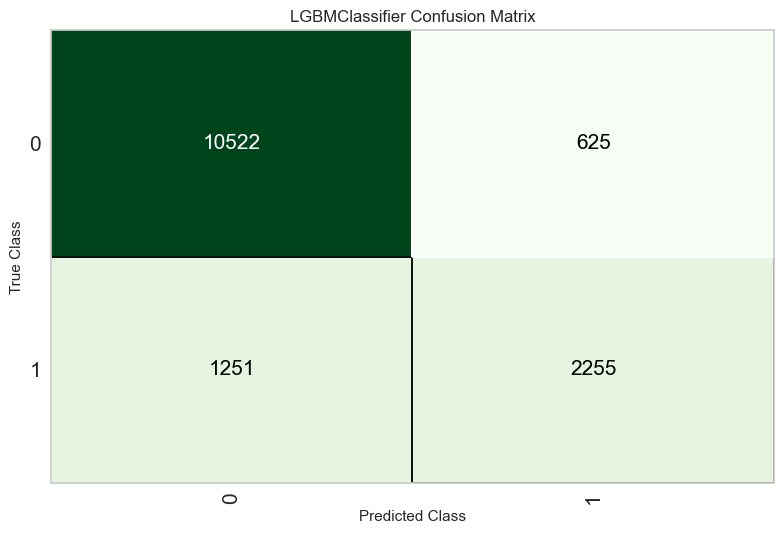

In [32]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

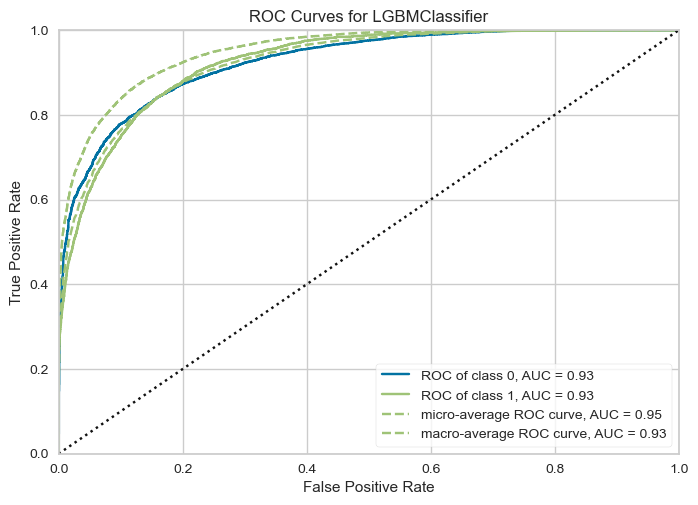

In [33]:
# plot AUC
plot_model(best, plot = 'auc')

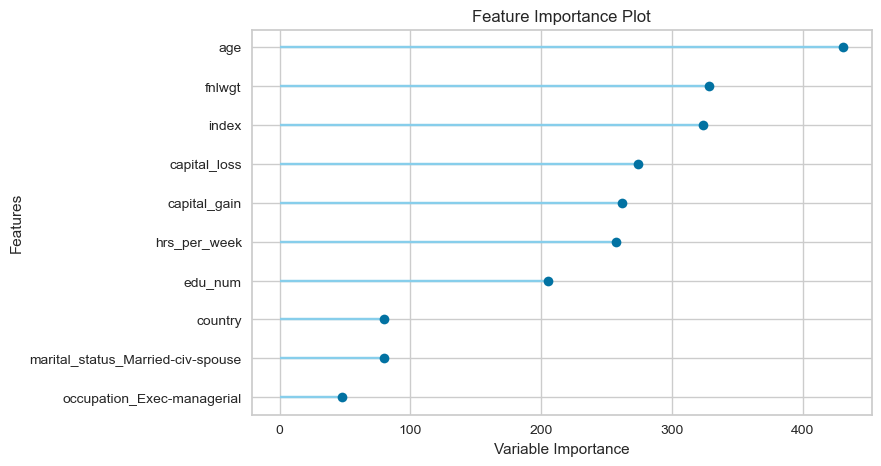

In [34]:
# plot feature importance
plot_model(best, plot = 'feature')

In [35]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8720,0.9255,0.8720,0.8672,0.8674,0.6254,0.6303


In [36]:
# show predictions df
holdout_pred.head()

,index,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country,target,prediction_label,prediction_score
39881,7320,57,Private,122562,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,>50K,<=50K,0.7679
29087,29087,48,Private,248254,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,7298,0,40,United-States,>50K,>50K,0.9937
45469,12908,23,Private,47541,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,<=50K,<=50K,0.9768
36283,3722,20,Private,59948,HS-grad,9,Never-married,Other-service,Own-child,Black,Female,0,0,18,United-States,<=50K,<=50K,0.9991
45342,12781,56,Private,146554,HS-grad,9,Separated,Adm-clerical,Other-relative,Black,Female,0,0,40,United-States,<=50K,<=50K,0.9861
